# TABLE OF CONTENT

1. Abstract
2. Introduction to Dataset
3. Import Libraries
4. Import Dataset
5. Exploratory Data Analysis 
     - Dropping Unneccessary Columns
     - Handling Missing Values
     - Correlation Matrix
     - Data Visualizing
     - Train-Test Split
     - Feature Scaling
         - Normalisation
     - Feature Selection
         1. Feature selection with correlation
         2. Univariate Selection 
         3. Feature Importance
         
6. Data Modelling
     - Logistic Regression (LR)
     - Decision Tree (DT)
     - Random Forest (RF)
     - Gaussian Naive Baiyes
     - Support Vector Machine (SVM)
     - Neural Networks
7. Data Evaluation
     - Confusion Matrix
     - Precision
     - Recall
     - F1-score
     - ROC 
     - AUC (Area under the curve)
     
8. Conclusion

## Abstract 

Bankruptcy predictions have become an important area in financial sector. This is due to the relevance of investors and creditors in estimating the probability of a firm going bankrupt. The purpose of this study is to use financial statements and other financial information for estimating bankruptcy risk.
In my dissertation, six machine learning algorithms, namely logistic regression, decision tree, random forest, naïve bayes, support vector machines, and neural network were used to predict bank bankruptcies. I utilized Russian banks dataset consisting of financial statements, bank metrics system, and macro economic indicators. These dataset was studied between 2008 and 2014 and it contains 72439 0bservations and 45 financial related information.
We created different machine learning models and evaluated on different performance metrics,namely accuracy, precision, and recall. Although, our dataset is an imbalanced class so we optimized our models based on AUROC.
Decision tree and random forest yields the best accuracy, although decision tree is insenstive to imbalanced class. However, we further evaluated using the AUROC metrics. The results obtained is 99.6% for decision tree and its similar to the 99.9% of random forest. They both outperformed logistic regression while neural network seems to be inferior to other classifiers. It is observed that our model achieved a better result than the previously reviewed studies.
Random forest outperform other models when we developed algorithms based on feature selection. Therefore, we conclude random forest is the best predictive model. Our study indicate that the features selected for our final models are related to the financial ratios used in previous studies. Surprisingly, we find that liability ratios seems to have the greatest influence on the outcome prediction. Furthermore, some features were important but has been ignored in the past such as net income, capital, and stock etc.


## Introduction to the dataset

The data used for this research was provided by (Maksimov, 2020) on Kaggle. The data consist of bank financial statements, bank system metrics, and macroeconomic indicators on monthly basis for all Russian banks in 2008-2014. For this period, over 50% of all banks were declared bankrupt.
The bank financial statements were parsed from (banki, n.d.). the macroeonomic and bank system indicators were extracted from (Bank of Russia, n.d.). The bank indicators describing the financial health of the bankrupt banks were collected during the period of six years. 
The data consists of approximately 72440 records of 3281 Russian banks and 45 features. 42 out of the features denote financial statements together with bank system metrics. The last column is the target variable which for simplicity, we will denote the banks that went bankrupt as class 1 and the unfailed banks as class 0. 


### Importing Libraries

In [1]:
# importing miscellaneous library 
from math import sqrt
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings 
warnings.filterwarnings('ignore')

# importing basic libraries for data organization, statistical operations and plotting 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro



# importing preprocessing libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

# importing classification models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# importing evaluation metrics libraries 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_roc_curve

%matplotlib inline

### Importing Datasets

In [2]:
# importing the dataset
Bank = pd.read_csv("dataset.csv")

# calling the top five rows of the dataset
Bank.head()

,License_number,date,net_assets,ROA,liquid,ibl,stocks,bond,oth_cap,sunk_retail_credit,...,micex_return,net_foreign_assets_diff,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,miacr_diff,default
0,0.0,1/02/2010,423017,27,112770,60000,0,0,0,0,...,0.000000,-156425,1595305,47521,33587.30532,214757,0.0,0.008065,-0.830116,0
1,0.0,1/03/2010,498411,75,172628,90000,0,0,0,0,...,-0.057148,225429,-265831,-34392,22186.02349,59909,-0.1,0.010699,-0.172562,0
2,0.0,1/04/2010,571220,54,211860,90000,0,0,0,997,...,0.043424,-128438,430871,-21876,-14983.52885,4293,0.1,-0.019848,-0.296650,0
3,0.0,1/05/2010,523027,41,159970,90000,0,0,0,481,...,0.048447,-223667,92737,-1075,-19523.94108,64243,-0.1,-0.012387,-0.255000,0
4,0.0,1/06/2010,473713,31,131782,135000,0,0,0,485,...,-0.105536,251702,-134963,81,-20743.43746,36008,0.1,0.042533,-0.533087,0


### Quick checks 
* Get the number of unique banks 
* Check the number of banks that went bankrupt


In [3]:
# number of banks in the dataset
print ("There are " + str(Bank["License_number"].nunique()) + " unique banks in the dataset")

There are 1006 unique banks in the dataset


In [4]:
defaulted = len(Bank[Bank['default'] == 1])
print ("The total number of banks that went bankrupt is " + str(defaulted))

The total number of banks that went bankrupt is 378


The above output returns the first five rows of the data set by default with Pandas head(). I used the function to have a preview the right data type in my dataset.

### Dropping unnecessary columns

In [5]:
Bank.drop(columns =['License_number','date'], axis = 1, inplace = True)
Bank.head()

,net_assets,ROA,liquid,ibl,stocks,bond,oth_cap,sunk_retail_credit,NI,organization_credit,...,micex_return,net_foreign_assets_diff,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,miacr_diff,default
0,423017,27,112770,60000,0,0,0,0,102,225000.0,...,0.000000,-156425,1595305,47521,33587.30532,214757,0.0,0.008065,-0.830116,0
1,498411,75,172628,90000,0,0,0,0,569,225000.0,...,-0.057148,225429,-265831,-34392,22186.02349,59909,-0.1,0.010699,-0.172562,0
2,571220,54,211860,90000,0,0,0,997,651,227287.0,...,0.043424,-128438,430871,-21876,-14983.52885,4293,0.1,-0.019848,-0.296650,0
3,523027,41,159970,90000,0,0,0,481,677,227130.0,...,0.048447,-223667,92737,-1075,-19523.94108,64243,-0.1,-0.012387,-0.255000,0
4,473713,31,131782,135000,0,0,0,485,644,191306.0,...,-0.105536,251702,-134963,81,-20743.43746,36008,0.1,0.042533,-0.533087,0


### Exploratory Data Analysis 

This is the first step in machine learning project with the aim to gain a deep understanding of the data. In this paper, I explored the dataset for interaction between variables to look for patterns, trends, correlations, and variations based on descriptive and graphical representation. Data exploratory anaysis is done prior to data modeling. 


In [6]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72439 entries, 0 to 72438
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   net_assets                   72439 non-null  int64  
 1   ROA                          72439 non-null  int64  
 2   liquid                       72439 non-null  int64  
 3   ibl                          72439 non-null  int64  
 4   stocks                       72439 non-null  int64  
 5   bond                         72439 non-null  int64  
 6   oth_cap                      72439 non-null  int64  
 7   sunk_retail_credit           72439 non-null  int64  
 8   NI                           72439 non-null  int64  
 9   organization_credit          72439 non-null  float64
 10  sunk_organization_credit     72439 non-null  int64  
 11  credit_portf                 72439 non-null  float64
 12  sunk_credit_portf            72439 non-null  int64  
 13  organization_dep

int64 and float64 are the data types of our features. With the function info(), I can see easily see if there are any missing values. Here, there are none.

In [7]:
 def quick_analysis(dataframe):
    print ("Rows and Columns: ")  # To check the shape of the data
    print (Bank.shape)
    print ("Column Names: ") # To inspect the columns names of the dataset
    print (Bank.columns)
    print ("Null Values: ") # statistical analysis for missing values 
    print (Bank.isna().sum())
    
quick_analysis (Bank)

Rows and Columns: 
(72439, 43)
Column Names: 
Index(['net_assets', 'ROA', 'liquid', 'ibl', 'stocks', 'bond', 'oth_cap',
       'sunk_retail_credit', 'NI', 'organization_credit',
       'sunk_organization_credit', 'credit_portf', 'sunk_credit_portf',
       'organization_deposit', 'retail_deposit', 'security_tot', 'ROE',
       'retail_credit', 'reserv_credit_perc', 'zalog_credit_perc',
       'foreign_na_fr', 'retail_deposit_fr', 'N3', 'N2', 'N1', 'capital',
       'msk_spb', 'INF_SA', 'NX_growth', 'micex_std', 'miacr_std',
       'miacr_amount', 'usd_rub_std_diff', 'micex_return',
       'net_foreign_assets_diff', 'net_gov_debt_diff', 'other_fin_debt_diff',
       'retail_debt_SA_DETREND_diff', 'stocks_capital_diff',
       'i_retail_spread_diff', 'usd_rub_return', 'miacr_diff', 'default'],
      dtype='object')
Null Values: 
net_assets                     0
ROA                            0
liquid                         0
ibl                            0
stocks                       

This tells us that the dataset is very large with 72439 rows and 45 columns. One of the features is a binary class which is the response variables we are predicting. There are no null values thta can be seen from the result so, I dont't need to worry about treating those.

I then use the describe() function to perform some descriptive statistics on the dataset columns. This function computes the mean, median, standard deviation and quartile values. it also returns the minimnum and maximum values in our dataset.

In [8]:
# Descriptive statistics 
Bank.describe()

,net_assets,ROA,liquid,ibl,stocks,bond,oth_cap,sunk_retail_credit,NI,organization_credit,...,micex_return,net_foreign_assets_diff,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,miacr_diff,default
count,7.243900e+04,72439.000000,7.243900e+04,7.243900e+04,7.243900e+04,7.243900e+04,7.243900e+04,7.243900e+04,7.243900e+04,7.243900e+04,...,72439.000000,7.243900e+04,7.243900e+04,7.243900e+04,72439.000000,7.243900e+04,72439.000000,72439.000000,72439.000000,72439.000000
mean,7.135913e+07,123.128411,4.960234e+06,7.609027e+06,6.596119e+05,7.997868e+06,1.751494e+06,6.572270e+05,4.331656e+05,3.096523e+07,...,0.004759,1.720799e+05,5.671959e+03,7.241447e+04,1574.198463,1.331702e+05,-0.036510,0.009324,0.080807,0.005218
std,7.037637e+08,943.157770,4.402058e+07,6.528896e+07,5.668977e+06,7.393573e+07,2.825632e+07,5.461939e+06,9.100231e+06,3.429028e+08,...,0.044285,1.145084e+06,7.261751e+05,2.141886e+05,48107.190070,7.068174e+05,4.103685,0.049243,0.817398,0.072049
min,0.000000e+00,-64556.000000,0.000000e+00,0.000000e+00,-1.223600e+04,0.000000e+00,0.000000e+00,0.000000e+00,-3.518901e+08,0.000000e+00,...,-0.115092,-4.312523e+06,-1.634070e+06,-1.790200e+05,-99457.822910,-2.072392e+06,-25.940000,-0.118357,-1.848351,0.000000
25%,1.279656e+06,14.000000,1.865395e+05,1.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.570000e+02,1.041000e+03,3.461265e+05,...,-0.024347,-2.961990e+05,-3.686350e+05,-8.200000e+01,-24685.737180,-6.898000e+03,-0.580000,-0.015871,-0.213459,0.000000
50%,3.617370e+06,91.000000,4.904740e+05,1.770360e+05,0.000000e+00,6.046600e+04,0.000000e+00,8.633000e+03,1.156400e+04,1.177932e+06,...,0.010585,1.245560e+05,-1.732200e+05,3.048400e+04,-1595.165212,4.123900e+04,-0.100000,-0.001414,0.021180,0.000000
75%,1.354213e+07,215.000000,1.455600e+06,8.000000e+05,1.560450e+04,1.093408e+06,6.600000e+01,5.861150e+04,5.958200e+04,4.616940e+06,...,0.039273,3.971840e+05,1.017930e+05,6.216800e+04,27251.100030,9.782300e+04,0.300000,0.026706,0.193273,0.000000
max,2.377734e+10,76314.000000,1.814549e+09,2.058386e+09,2.559021e+08,2.453111e+09,9.821342e+08,1.770647e+08,6.241876e+08,1.190488e+10,...,0.107197,5.351783e+06,2.541323e+06,1.839484e+06,127125.057700,5.460819e+06,16.750000,0.206696,5.257585,1.000000


In [9]:
Bank['default'].value_counts()

0    72061
1      378
Name: default, dtype: int64

72061 out of 72349 are non-bankrupt; their default value is 0 while 378 are bankrupt which denotes value of 1.

## Checking for Missing Values 

First, we will inspect for missing values in our bank dataset.

In [10]:
# inspect missing values 
Bank.isnull().sum()

net_assets                     0
ROA                            0
liquid                         0
ibl                            0
stocks                         0
bond                           0
oth_cap                        0
sunk_retail_credit             0
NI                             0
organization_credit            0
sunk_organization_credit       0
credit_portf                   0
sunk_credit_portf              0
organization_deposit           0
retail_deposit                 0
security_tot                   0
ROE                            0
retail_credit                  0
reserv_credit_perc             0
zalog_credit_perc              0
foreign_na_fr                  0
retail_deposit_fr              0
N3                             0
N2                             0
N1                             0
capital                        0
msk_spb                        0
INF_SA                         0
NX_growth                      0
micex_std                      0
miacr_std 

We can see that our dataset is free of missing values. Hence, we are not bothered treating incomplete or inaccurate data.

## Correlation

## What is correlation?
correlation is a statistical measure to show the strength of relationship of one variable with another variable. There are two types of correlation:

1. Positive correlation 

A positive correlation is a relationship between two variables in which both variables move in the same direction. For simplicity, when one variable increases so is the other variables. Likewise when one decreases the other decreases.

2. Negative correlation

A negative correlation is a relationship between two variables in which both variables move in the opposite direction. Therefore, when one variable increases, the other decreases, or when one variable decrease the other increases.

In [11]:
# Compute the correlation matrix 
corr = round(Bank.corr(),2)
corr

,net_assets,ROA,liquid,ibl,stocks,bond,oth_cap,sunk_retail_credit,NI,organization_credit,...,micex_return,net_foreign_assets_diff,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,miacr_diff,default
net_assets,1.00,-0.00,0.92,0.77,0.50,0.95,0.79,0.74,0.75,0.99,...,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,-0.00,-0.01
ROA,-0.00,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.04,0.00,...,0.00,0.01,0.01,-0.01,0.00,0.02,0.00,0.02,0.02,-0.07
liquid,0.92,0.00,1.00,0.70,0.41,0.86,0.66,0.69,0.71,0.90,...,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,-0.00,-0.01
ibl,0.77,-0.00,0.70,1.00,0.50,0.69,0.78,0.59,0.48,0.71,...,0.01,0.00,0.00,0.02,0.01,0.00,0.00,0.00,-0.00,-0.01
stocks,0.50,-0.00,0.41,0.50,1.00,0.52,0.51,0.27,0.31,0.51,...,-0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.01,-0.00,0.00,-0.01
bond,0.95,-0.00,0.86,0.69,0.52,1.00,0.72,0.69,0.71,0.95,...,0.01,-0.00,0.01,0.01,0.00,0.00,0.00,-0.00,-0.01,-0.01
oth_cap,0.79,-0.00,0.66,0.78,0.51,0.72,1.00,0.45,0.52,0.78,...,0.00,-0.00,0.00,0.01,0.00,0.00,0.00,0.00,-0.00,-0.00
sunk_retail_credit,0.74,-0.00,0.69,0.59,0.27,0.69,0.45,1.00,0.57,0.68,...,0.00,-0.01,0.01,0.02,0.00,0.00,0.00,-0.00,-0.01,-0.01
NI,0.75,0.04,0.71,0.48,0.31,0.71,0.52,0.57,1.00,0.75,...,0.00,-0.00,-0.01,0.00,-0.00,-0.01,-0.00,0.00,0.00,-0.01
organization_credit,0.99,0.00,0.90,0.71,0.51,0.95,0.78,0.68,0.75,1.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,-0.00,-0.01


To visualise the correlation between features, we are going to use the heatmap. This is an old plot method but it is very powerful. 

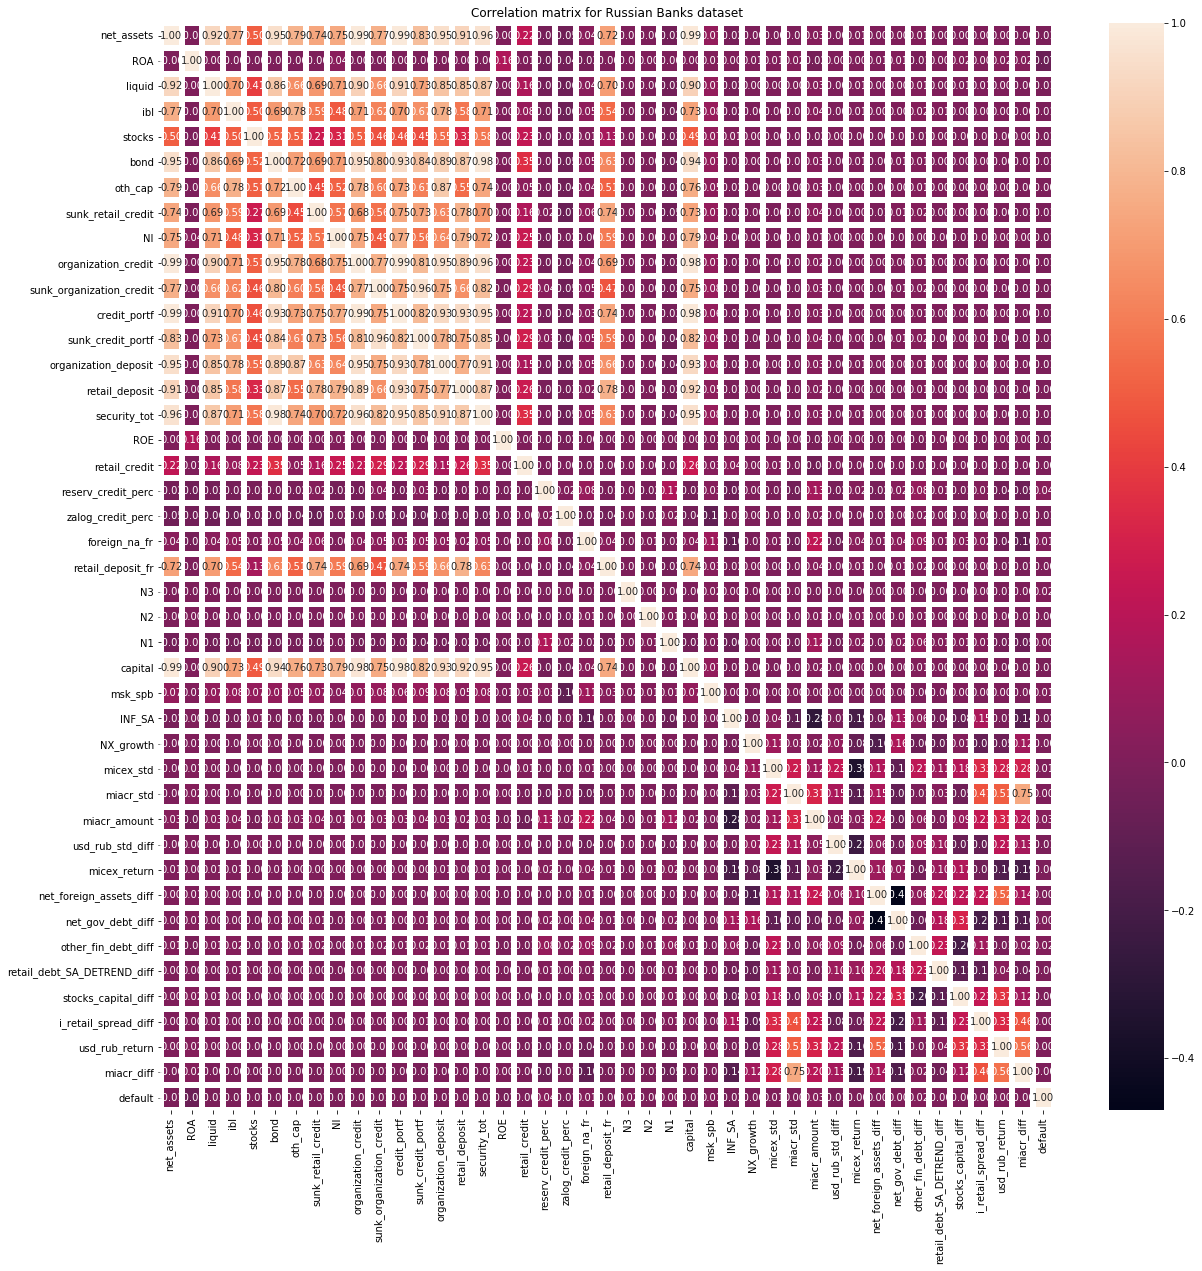

In [12]:
# Visualize the correlation matrix plot 
f,ax = plt.subplots(figsize =(20,20))
sns.heatmap(Bank.corr(), annot = True, linewidths = 5, fmt = '.2f', ax = ax)
plt.title("Correlation matrix for Russian Banks dataset")
plt.show()

## Inferences:
Based on the correlation plot, a high proportion of the explanatory variables have little or no correlation with default variable.

From the correlation matrix, we can select the features that will be taking forward for our model.

## Data Visualisation

This is just to help us understand the data graphically. We are going to use seaborn and matplotlib modules to show diversity of plots. However, we are not selecting feature, we are just trying to understand the pattern and trends that might be present in our dataset.

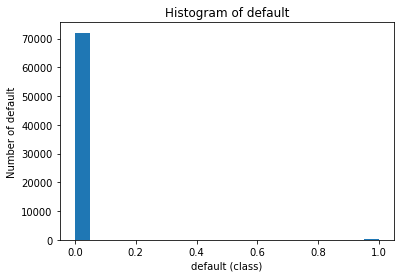

In [13]:
plt.hist('default', bins = 20, data = Bank)
plt.title("Histogram of default")
plt.xlabel("default (class)")
plt.ylabel("Number of default")
plt.show()

The histogram further conforms that there is presence of an outlier in the default variable. There is a single peak at the left side of the distribution. The outlier is the number of failed banks. Hence, we would not impute it but predict how they failed.

## Target Variable

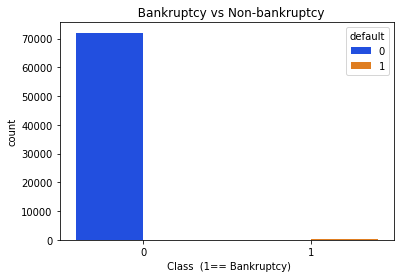

In [14]:
# visualising the target variable in the dataset
sns.countplot(x = 'default', data = Bank, hue = 'default', palette = 'bright')
plt.title("  Bankruptcy vs Non-bankruptcy")
plt.xlabel(" Class  (1== Bankruptcy)")
plt.show()

As we can see that the data is imbalanced and this graph confirmed it. From the plot, over 90% of the banks didn't go bankrupt. Most classifiers would always predict no bankruptcy and would be in almost cases correct.  Such classifiers would be useless regardless of the accuracy.

From visualising the plot, we can infer that there is a higher proportion of unfailed banks compared to an insignificant number of failed banks.

In [15]:
# Now let us check the number of percentage 
Count_unfailed_banks = len(Bank[Bank["default"]==0]) # unfailed banks are repersented by 0
Count_bankrupt_banks = len(Bank[Bank["default"]==1]) # failed by 1
Percentage_of_unfailed_banks = Count_unfailed_banks/(Count_unfailed_banks+Count_bankrupt_banks)
print("percentage of non-bankrupt banks is ",Percentage_of_unfailed_banks*100)
Percentage_of_bankrupt_banks= Count_bankrupt_banks/(Count_unfailed_banks+Count_bankrupt_banks)
print("percentage of bankrupt banks is ",Percentage_of_bankrupt_banks*100)


percentage of non-bankrupt banks is  99.4781816424854
percentage of bankrupt banks is  0.5218183575145985


1. In the data there is 0.5% for the bankrupt banks while 99.5% are for the non-bankrupt banks.
2. Therefore, resampling is needed to be implemented on this dataset.

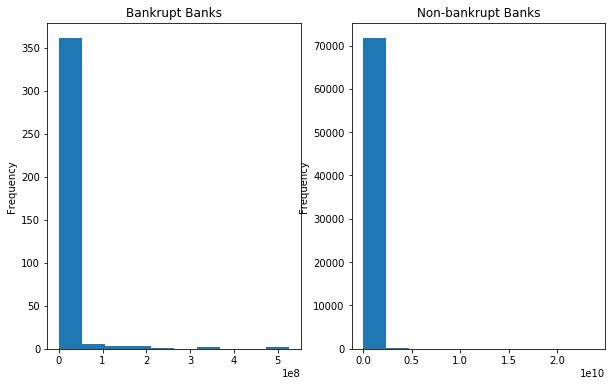

In [16]:
bankrupt_banks = Bank[Bank["default"]==1]
Unfailed_banks = Bank[Bank["default"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
bankrupt_banks.net_assets.plot.hist(title="Bankrupt Banks")
plt.subplot(122)
Unfailed_banks.net_assets.plot.hist(title="Non-bankrupt Banks")

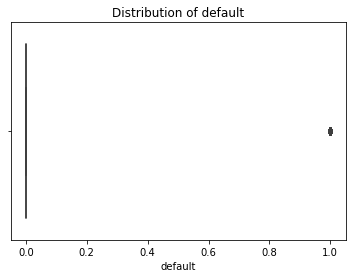

In [17]:
sns.boxplot(x = 'default', data = Bank, hue ='default', width = 0.8)
plt.title("Distribution of default")
plt.show()

As we visualize the response column we can see that there is an outlier of 1.0. In this case, the outlier here is what we are required to predict which is the outcome of failed banks in Russia.

## Shapiro-Test for Normality:

In [18]:
target = Bank.iloc[:,-1]

In [19]:
# test for normality of the target variable 
stat, p = shapiro(target)
print('Statistics = %.3f, p = %.3f' % (stat,p))
# Interpret the statistics 
alpha = 0.05
if p > alpha:
    print("Target is a normal distribution (fail to reject the null hypothesis)")
else:
        print("Target does not follow a gaussian distribution (reject Ho)")

Statistics = 0.043, p = 0.000
Target does not follow a gaussian distribution (reject Ho)


The p-value is less than the significant level, which implies the hypothesis test for normality is not true.

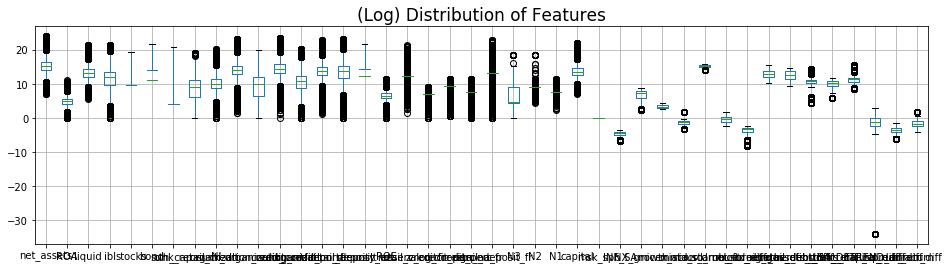

In [104]:
plt.figure(figsize=(16,4))
np.log(Bank.iloc[:,:-1]).boxplot()
plt.title('(Log) Distribution of Features', fontsize=17)
plt.show()

## Feature Scaling 

Feature scaling is a method in machine learning to normalize the range of independent features of data. It is a preprocessing technique called data normalization. In our data, there are some features that have a broad range of values. We are going to be developing some machine learning models like SVM, neural nets, and logistic regression. Hence, they require the data to be normalised to improve the model result. On the other hand, tree-based algorithms such as decision tree and random forest are insentitive to the scale of the features because the tree is only splitting a node based on a single feature. However, we are still going to apply the normalised data on the algorithms. When applying machine learning algorithms to features with different scales, the larger scale will completely dominate the others. We are going to apply one of the most common ways to normalise data which is Min-Max normalisation. It works by assigning 0 and 1 as the minimum and maximum values respectively and every other value gets transformed into a decimal between 0 and 1. The code is written below:

In [20]:
# selecting the target and the explanatory variables 
features = Bank.iloc[:,:-1]
target = Bank.iloc[:,-1]

In [21]:
# normalising the explanatory varibales 
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

## Splitting the dataset
In machine learning, the approach of splitting a dataset into two parts is recommended in order to provide a good model accuracy. The data is split into training data and testing data, where the former is used to fit a model and the latter is used to evaluate on the fitted model. We are going to divide the dataset into 80% for training data and 20% goes to the testing data. The code for the split is carried out below:

In [22]:
# splitting the dataset
original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)

In [23]:
# inspect the shape of the split 
print ('Train', original_X_train.shape, original_y_train.shape)
print ('Test', original_X_test.shape, original_y_test.shape)

Train (57951, 42) (57951,)
Test (14488, 42) (14488,)


In [24]:
len(original_X_train), len(original_X_test)

(57951, 14488)

As we can see from getting the shape of the split, the independent variables have the rows and columns while the response variable is a unit vector.

In [25]:
original_X_train[0]

array([1.43157158e-04, 4.57322354e-01, 3.57512005e-04, 3.69221392e-04,
       4.78128652e-05, 0.00000000e+00, 2.63507773e-05, 6.89013778e-07,
       3.60510306e-01, 1.01965770e-04, 4.83785048e-05, 8.10861194e-05,
       3.91967257e-05, 2.44642868e-04, 8.96841062e-05, 1.66684143e-05,
       9.79139070e-01, 1.36709559e-04, 1.09400000e-01, 1.15335180e-01,
       2.07618342e-02, 6.07070593e-05, 9.60000010e-07, 9.91500000e-05,
       2.06134212e-02, 9.15049118e-02, 0.00000000e+00, 4.20137218e-01,
       5.84923664e-01, 3.07587058e-02, 3.87841295e-02, 2.40369174e-01,
       5.55202648e-01, 5.25868427e-01, 4.00525708e-01, 1.00000000e+00,
       4.69981729e-02, 8.31918614e-01, 3.36649803e-01, 0.00000000e+00,
       4.48664459e-01, 2.12153473e-01])

In [26]:
original_X_test[0]

array([6.20928954e-04, 4.59380990e-01, 8.40822220e-04, 4.69052056e-04,
       1.66094610e-04, 5.74790038e-04, 0.00000000e+00, 2.12278368e-04,
       3.60553494e-01, 7.13315443e-04, 4.56641484e-04, 5.89935450e-04,
       4.34603319e-04, 7.51969546e-04, 5.91503649e-04, 5.80379962e-04,
       9.79675085e-01, 1.36709559e-04, 4.81000000e-02, 8.60055402e-02,
       7.27814854e-02, 1.66721404e-04, 1.30670001e-04, 7.30100000e-05,
       1.30912970e-02, 9.19167906e-02, 0.00000000e+00, 6.33539405e-01,
       3.54154433e-01, 5.77932574e-01, 1.72990761e-02, 3.16326323e-01,
       4.26862507e-01, 4.04571055e-01, 5.65274630e-01, 1.88082894e-01,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 6.14898103e-01,
       3.07854991e-01, 2.63912312e-01])

### Data Modelling without sampling (original data)

Lets apply various classifiers on the original data to get baseline results.

In [27]:
# Logistic Regression 
# using 10 folds cross validation
glm = LogisticRegression()
kfold = KFold(n_splits=10, random_state=0) # k=10, split the data into 10 equal parts


In [28]:
accuracy = cross_val_score(glm, features, target,cv = 10, scoring = 'accuracy')
recall = cross_val_score(glm, features, target,cv = 10, scoring = 'recall')
precision = cross_val_score(glm, features, target,cv = 10, scoring = 'precision')
ROC= cross_val_score(glm, features, target,cv = 10, scoring = 'roc_auc')
print('The accuracy for Logistic regression is: ', round(accuracy.mean()*100,2))
print('The recall for Logistic regression is: ', round(recall.mean()*100,2))
print('The precision for Logistic regression is: ', round(precision.mean()*100,2))
print('The AUROC for Logistic regression is: ', round(ROC.mean()*100,2))

The accuracy for Logistic regression is:  99.48
The recall for Logistic regression is:  0.0
The precision for Logistic regression is:  0.0
The AUROC for Logistic regression is:  68.2


In [31]:
# Decision Tree
DT = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=0) # k=10, split the data into 10 equal parts
accuracy = cross_val_score(DT, features, target,cv = 10, scoring = 'accuracy')
recall = cross_val_score(DT, features, target,cv = 10, scoring = 'recall')
precision = cross_val_score(DT, features, target,cv = 10, scoring = 'precision')
ROC= cross_val_score(DT, features, target,cv = 10, scoring = 'roc_auc')
print('The accuracy for Decision Tree is: ', round(accuracy.mean()*100,2))
print('The recall for Decision Tree is: ', round(recall.mean()*100,2))
print('The precision for Decision Tree is: ', round(precision.mean()*100,2))
print('The AUROC for Decision Tree is: ', round(ROC.mean()*100,2))

The accuracy for Decision Tree is:  98.64
The recall for Decision Tree is:  10.6
The precision for Decision Tree is:  6.06
The AUROC for Decision Tree is:  53.82


In [32]:
# Random Forest
Rf =  RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=0) # k=10, split the data into 10 equal parts
accuracy = cross_val_score(Rf, features, target,cv = 10, scoring = 'accuracy')
recall = cross_val_score(Rf, features, target,cv = 10, scoring = 'recall')
precision = cross_val_score(Rf, features, target,cv = 10, scoring = 'precision')
ROC= cross_val_score(Rf, features, target,cv = 10, scoring = 'roc_auc')
print('The accuracy for Random Forest is: ', round(accuracy.mean()*100,2))
print('The recall for Random Forest is: ', round(recall.mean()*100,2))
print('The precision for Random Forest is: ', round(precision.mean()*100,2))
print('The AUROC for Random Forest is: ', round(ROC.mean()*100,2))

The accuracy for Random Forest is:  99.48
The recall for Random Forest is:  0.53
The precision for Random Forest is:  30.0
The AUROC for Random Forest is:  77.35


In [33]:
# Naive bayes
NB =  BernoulliNB()
kfold = KFold(n_splits=10, random_state=0) # k=10, split the data into 10 equal parts
accuracy = cross_val_score(NB, features, target,cv = 10, scoring = 'accuracy')
recall = cross_val_score(NB, features, target,cv = 10, scoring = 'recall')
precision = cross_val_score(NB, features, target,cv = 10, scoring = 'precision')
ROC= cross_val_score(NB, features, target,cv = 10, scoring = 'roc_auc')
print('The accuracy for Naive Bayes is: ', round(accuracy.mean()*100,2))
print('The recall for Naive Bayes is: ', round(recall.mean()*100,2))
print('The precision for Naive Bayes is: ', round(precision.mean()*100,2))
print('The AUROC for Naive Bayes is: ', round(ROC.mean()*100,2))

The accuracy for Naive Bayes is:  98.94
The recall for Naive Bayes is:  0.53
The precision for Naive Bayes is:  1.25
The AUROC for Naive Bayes is:  66.15


In [34]:
# Support Vector Machine 
svm = SVC()
kfold = KFold(n_splits=10, random_state=0) # k=10, split the data into 10 equal parts
accuracy = cross_val_score(svm, features, target,cv = 10, scoring = 'accuracy')
recall = cross_val_score(svm, features, target,cv = 10, scoring = 'recall')
precision = cross_val_score(svm, features, target,cv = 10, scoring = 'precision')
ROC= cross_val_score(svm, features, target,cv = 10, scoring = 'roc_auc')
print('The accuracy for Support Vector Classifier is: ', round(accuracy.mean()*100,2))
print('The recall for Support Vector Classifier is: ', round(recall.mean()*100,2))
print('The precision for Support Vector Classifier is: ', round(precision.mean()*100,2))
print('The AUROC for Support Vector Classifier is: ', round(ROC.mean()*100,2))

The accuracy for Support Vector Classifier is:  99.48
The recall for Support Vector Classifier is:  0.0
The precision for Support Vector Classifier is:  0.0
The AUROC for Support Vector Classifier is:  54.71


In [ ]:
# Neural Nets
NN = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (42), alpha=1e-5, activation='relu')
kfold = KFold(n_splits=10, random_state=0) # k=10, split the data into 10 equal parts
accuracy = cross_val_score(NN, features, target,cv = 10, scoring = 'accuracy')
recall = cross_val_score(NN, features, target,cv = 10, scoring = 'recall')
precision = cross_val_score(NN, features, target,cv = 10, scoring = 'precision')
ROC= cross_val_score(NN, features, target,cv = 10, scoring = 'roc_auc')
print('The accuracy for Neural Nets is: ', round(accuracy.mean()*100,2))
print('The recall for Neural Nets is: ', round(recall.mean()*100,2))
print('The precision for Neural Nets is: ', round(precision.mean()*100,2))
print('The AUROC for Neural Nets is: ', round(ROC.mean()*100,2))

In [ ]:
print('The cross validated score for neural net is: ', round(scores.mean()*100,2))
print('The recall score for Logistic regression is: ', recall_score(original_y_test,glm_pred))
print('The f1-score score for Logistic regression is: ', f1_score(original_y_test,glm_pred))
print('The precision score for Logistic regression is: ', precision_score(original_y_test,glm_pred))
print('The auc for Logistic regression is: ', roc_auc_score(original_y_test,glm_pred))

## Imbalanced Classification

After much observation, I noticed my dataset is imbalanced as I have observations belonging to one class to be significantly more than the the observations belonging to the other class i.e having more number of non-default class than the number of default class This type of problem will develop biased and inaccurate models. To handle this imbalanced dataset, I am going to implement three basic sampling techniques as well as taken into consideration each technique for its cons and pros. 

 - Undersampling:- This type of sampling technique balance the dataset by reducing or eliminating the size of the majority class in order to keep only a part of these point.
    
 - Oversampling:- This balance the dataset by increasing the size of the rare event due to lack of quality and insufficient data. It works by replicating some points from the minority class in order to increase its cardinality.
 
 The goal is to fit the model either with the undersampled data and oversampled and evaluate it on the test data.
    
First, I will start by implementing undersampling and then apply on the following classifiers:

1. Logistic Regression

2. Decision Tree Classifier

3. Random Forest Classifier 

4. Naive Bayes Classifier 

5. SVM 

6. Neural Networks


## 1. Undersample majority class

Undersampling aims to balance dataset by eliminating or reducing the the size of the abundant class. The majority class in my data is the non-bankrupt class. This method is best used on large data. meanwhile the drawback is in the loss of useful information which could lead to underfitting of the model.

I will import the resampling technique module from Scikit-learn to reduce samples from the majority class.


### Splitting data

In [42]:
# separate features and target
X = Bank.drop("default", axis = 1)  # independent variables
y = Bank["default"] # target variable 

# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [43]:
# concatenate our training data back together
X = pd.concat([X_train, Y_train], axis=1)

In [44]:
# separate minority and majority classes
unfailed = X[X.default==0]
failed = X[X.default==1]

unfailed_downsampled = resample(unfailed,
                                replace = False,  # sample without replacement
                                n_samples = len(failed), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([unfailed_downsampled, failed])

# checking counts
downsampled.default.value_counts()

1    300
0    300
Name: default, dtype: int64

Text(0, 0.5, 'count')

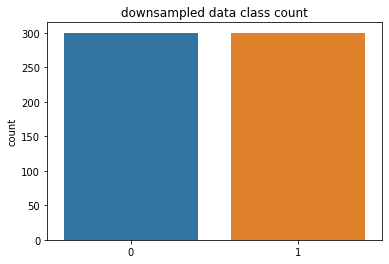

In [45]:
y=downsampled.default.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('downsampled data class count')
plt.ylabel('count')

## Predictive Modelling

In [46]:
# Logistic Regression

Y_train = downsampled.default
X_train = downsampled.drop("default", axis = 1)

downsampled = LogisticRegression(solver ='liblinear')
downsampled_lr = downsampled.fit(X_train, Y_train)
downsampled_pred = downsampled.predict(X_test)

print("1. The recall score of the model is {}\n".format(recall_score(Y_test,downsampled_pred)))
print("2. The F-1 score of the model is {}\n".format(f1_score(Y_test,downsampled_pred)))
print("3. The precision score of the model is {}\n".format(precision_score(Y_test,downsampled_pred)))
print("4. The AUC score of the model is {}\n".format(roc_auc_score(Y_test,downsampled_pred)))

1. The recall score of the model is 0.782051282051282

2. The F-1 score of the model is 0.01427735517846694

3. The precision score of the model is 0.007204440770048423

4. The AUC score of the model is 0.5993531913379241



In [47]:
# classification report
print(classification_report(Y_test,downsampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59     14410
           1       0.01      0.78      0.01        78

    accuracy                           0.42     14488
   macro avg       0.50      0.60      0.30     14488
weighted avg       0.99      0.42      0.58     14488



In [48]:
# Decision Tree

dt = DecisionTreeClassifier() 
downsampled_dt = dt.fit(X_train, Y_train)
downsampled_dt_pred = dt.predict(X_test)

# check the accuracy
acc_dt = round(accuracy_score(Y_test,downsampled_dt_pred)* 100, 2)
print('The accuracy of the Decision Tree Classifier is',acc_dt)               

The accuracy of the Decision Tree Classifier is 67.88


In [49]:
# Random Forest

clf_rf = RandomForestClassifier()
downsampled_rf = clf_rf.fit(X_train,Y_train)
downsampled_rf_pred = clf_rf.predict(X_test)
clf_rf_acc = round(accuracy_score(Y_test,downsampled_rf_pred)*100,2)
print("Accuracy is ", clf_rf_acc)

Accuracy is  76.62


In [50]:
# Naive bayes

NB= BernoulliNB()
downsampled_NB = NB.fit(X_train,Y_train)
downsampled_NB_pred = NB.predict(X_test) 
nb_acc = round(accuracy_score(Y_test,downsampled_NB_pred)*100,2)
print('The accuracy of the Gaussian Naive Bayes Classifier is',nb_acc)

The accuracy of the Gaussian Naive Bayes Classifier is 76.57


In [51]:
# Support vector machine 

svm = SVC()
downsampled_svm = svm.fit(X_train, Y_train)
downsampled_svm_pred = svm.predict(X_test)
acc_svm = round(accuracy_score(Y_test,downsampled_svm_pred) * 100, 2)
print('The accuracy of the Support vector machines Classifier is',acc_svm)

The accuracy of the Support vector machines Classifier is 3.43


In [52]:
# Neural nets
NN = MLPClassifier(solver='lbfgs', alpha = 1e-5,
                    hidden_layer_sizes=(42,))
downsampled_NN = NN.fit(X_train,Y_train)
downsampled_NN_pred = NN.predict(X_test)

acc_NN = round(accuracy_score(Y_test,downsampled_NN_pred) * 100, 2)
print('The accuracy of the neural nets Classifier is',acc_NN)

The accuracy of the neural nets Classifier is 1.34


## Oversampling Minority Class

Oversampling is one of the resampling techniques which balance dataset by increasing the siz of the rare event i.e it replicates some points from the minority classs in order to increase the cardinality. The advanatage of choosing oversampling is that it leads to no information loss and it outperforms undersampling technique. A con to consider is that it can increase the likelihood of overfitting since it replicates the minority class event.

I will use the resampling module from Scikit-learn to randomly replicate samples from the minority class.

In [58]:
# separate features and target
X = Bank.drop("default", axis = 1)  # independent variables
y = Bank["default"] # target variable 

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)


In [59]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,net_assets,ROA,liquid,ibl,stocks,bond,oth_cap,sunk_retail_credit,NI,organization_credit,...,micex_return,net_foreign_assets_diff,net_gov_debt_diff,other_fin_debt_diff,retail_debt_SA_DETREND_diff,stocks_capital_diff,i_retail_spread_diff,usd_rub_return,miacr_diff,default
9976,4269003,-104,341620,0,0,380739,0,182420,-25071,279613.0,...,0.013073,-765271,326966,-58049,-53370.21083,137681,0.23,-0.013513,-0.260000,0
42050,3385523,399,296526,172163,0,36524,0,1452,23725,2315017.0,...,-0.001651,1684655,-1476147,-27018,-61501.78571,7806,-1.68,0.043206,-0.062971,0
27456,17365477,260,1335700,14910,31956,2675558,0,144037,389711,10443769.0,...,-0.006700,-95412,-373974,9337,16513.03591,90175,0.30,0.018529,0.145739,0
35296,692622,58,54926,100032,435,0,0,570,2088,292420.0,...,-0.004079,231336,-118978,1064354,-34891.88375,-145143,-0.13,-0.009408,-0.424110,0
4215,2647062,-24,697635,141349,52300,0,0,78891,-486,1080028.0,...,0.000000,-156425,1595305,47521,33587.30532,214757,0.00,0.008065,-0.830116,0


In [60]:
# separate minority and majority classes

non_bankrupt = X[X.default==0]
bankrupt = X[X.default==1]

# upsample minority
bankrupt_upsampled = resample(bankrupt,
                          replace=True, # sample with replacement
                          n_samples=len(non_bankrupt), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([non_bankrupt, bankrupt_upsampled])

# check new class counts
upsampled.default.value_counts()

1    57651
0    57651
Name: default, dtype: int64

Text(0, 0.5, 'count')

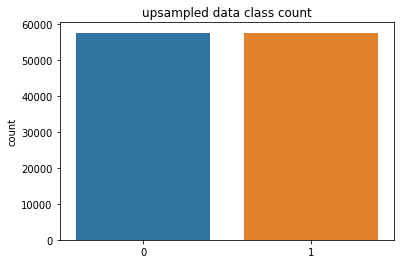

In [61]:
y=upsampled.default.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('upsampled data class count')
plt.ylabel('count')

In [64]:
# Logistic Regression

lr = LogisticRegression(solver ='liblinear')
upsampled_lr = lr.fit(X_train, y_train)
upsampled_pred = lr.predict(X_test)

print("1. The recall score of the model is {}\n".format(recall_score(Y_test,upsampled_pred)))
print("2. The F-1 score of the model is {}\n".format(f1_score(Y_test,upsampled_pred)))
print("2. The precision score of the model is {}\n".format(precision_score(Y_test,upsampled_pred)))
print("2. The AUC score of the model is {}\n".format(roc_auc_score(Y_test,upsampled_pred)))

1. The recall score of the model is 0.0

2. The F-1 score of the model is 0.0

2. The precision score of the model is 0.0

2. The AUC score of the model is 0.4999306037473976



In [65]:
print(classification_report(Y_test,upsampled_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14410
           1       0.00      0.00      0.00        78

    accuracy                           0.99     14488
   macro avg       0.50      0.50      0.50     14488
weighted avg       0.99      0.99      0.99     14488



In [66]:
# Decision Tree 
dt = DecisionTreeClassifier() 
upsampled_dt = dt.fit(X_train, y_train)
upsampled_pred = dt.predict(X_test)
print("1. The accuracy score of the model is {}\n".format(accuracy_score(Y_test,upsampled_pred)))
print("2. The recall score of the model is {}\n".format(recall_score(Y_test,upsampled_pred)))
print("3. The F-1 score of the model is {}\n".format(f1_score(Y_test,upsampled_pred)))
print("4. The precision score of the model is {}\n".format(precision_score(Y_test,upsampled_pred)))
print("5. The AUC score of the model is {}\n".format(roc_auc_score(Y_test,upsampled_pred)))

1. The accuracy score of the model is 0.9880590833793484

2. The recall score of the model is 0.08974358974358974

3. The F-1 score of the model is 0.0748663101604278

4. The precision score of the model is 0.06422018348623854

5. The AUC score of the model is 0.5413325859890744



In [67]:
# Random Forest
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(X_train,y_train)
upsampled_pred = clf_rf.predict(X_test)

print("1. The accuracy of the model is {}\n".format(accuracy_score(Y_test,upsampled_pred)))
print("2. The recall score of the model is {}\n".format(recall_score(Y_test,upsampled_pred)))
print("3. The F-1 score of the model is {}\n".format(f1_score(Y_test,upsampled_pred)))
print("4. The precision score of the model is {}\n".format(precision_score(Y_test,upsampled_pred)))
print("5. The AUC score of the model is {}\n".format(roc_auc_score(Y_test,upsampled_pred)))

1. The accuracy of the model is 0.9946162341247929

2. The recall score of the model is 0.0

3. The F-1 score of the model is 0.0

4. The precision score of the model is 0.0

5. The AUC score of the model is 0.5



In [68]:
# Naive bayes
model= BernoulliNB()
model.fit(X_train,y_train)
upsampled_pred = model.predict(X_test)

print("1. The accuracy of the model is {}\n".format(accuracy_score(Y_test,upsampled_pred)))
print("2. The recall score of the model is {}\n".format(recall_score(Y_test,upsampled_pred)))
print("3. The F-1 score of the model is {}\n".format(f1_score(Y_test,upsampled_pred)))
print("4. The precision score of the model is {}\n".format(precision_score(Y_test,upsampled_pred)))
print("5. The AUC score of the model is {}\n".format(roc_auc_score(Y_test,upsampled_pred)))

1. The accuracy of the model is 0.9898536720044174

2. The recall score of the model is 0.02564102564102564

3. The F-1 score of the model is 0.026490066225165563

4. The precision score of the model is 0.0273972602739726

5. The AUC score of the model is 0.510356945853129



In [69]:
# Support vector machine 
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("1. The accuracy of the model is {}\n".format(accuracy_score(Y_test,svm_pred)))
print("2. The recall score of the model is {}\n".format(recall_score(Y_test,svm_pred)))
print("3. The F-1 score of the model is {}\n".format(f1_score(Y_test,svm_pred)))
print("4. The precision score of the model is {}\n".format(precision_score(Y_test,svm_pred)))
print("5. The AUC score of the model is {}\n".format(roc_auc_score(Y_test,svm_pred)))

1. The accuracy of the model is 0.9946162341247929

2. The recall score of the model is 0.0

3. The F-1 score of the model is 0.0

4. The precision score of the model is 0.0

5. The AUC score of the model is 0.5



In [70]:
# Neural nets
NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(42,))
NN.fit(X_train,y_train)
NN_pred = NN.predict(X_test)

acc_NN = round(accuracy_score(y_test,NN_pred) * 100, 2)
print('The accuracy of the neural nets Classifier is',acc_NN)

The accuracy of the neural nets Classifier is 71.31


## Feature Selection

Feature selection is one of the core and important concept in machine learning which have a huge impacts on the performance of a model. It is a process where you automatically or manually select the features which contribute most of yor prediction outcome or response in which you are interested in. First, having irrelevant features in the data can decrease the accuracy of the model.

Secondly, the more features you have, the longer it will take to train your model. When applying feature selection on a dataset, it tends to use fewer data points to reduce algorithm complexity and trains the algorithms faster.

To reduce overfitting and inaccurate result, we will introduce feature selection techniques to keep the most important features for the model.

In this part, we will select feature with different techniques which includes feature selection with correlation, univariate feature selection, and tree-based feature importance.

## Feature selection with correlation matrix

As shown in the heat map, net_assets is highly correlated with liquid, and ibl. So I will select net_assets. Lets find out other variables that are correlated with each other.

stock, bond, and oth_cap are correlated with each other. Therefore, I will choose stock. sunk_retail_credit, N1, and organization_credit are also correlated and i will choose organization_credit. sunk_organization_credit, credit_portf, and sunk_credit_portf are highly correlated, I will choose credit_portf as a feature to use. organization_deposit, retail_deposit, and security_tot are also correlated and I use retail deposit.

miacr_diff is correlated with miacr_std and I will go with miacr_std.

In [71]:
# drop the unnecessary column
drop_list = ['oth_cap','sunk_retail_credit','N1','sunk_organization_credit','sunk_credit_portf','security_tot',
            'organization_deposit','miacr_diff','retail_deposit','foreign_na_fr','retail_credit','retail_deposit_fr','N2','N3',
            'NX_growth','miacr_std','micex_return','net_foreign_assets_diff','net_gov_debt_diff','stocks_capital_diff',
            'i_retail_spread_diff','usd_rub_return','miacr_diff','retail_debt_SA_DETREND_diff']
upsampled.drop(drop_list, axis = 1, inplace = True)
upsampled.head()

,net_assets,ROA,liquid,ibl,stocks,bond,NI,organization_credit,credit_portf,ROE,reserv_credit_perc,zalog_credit_perc,capital,msk_spb,INF_SA,micex_std,miacr_amount,usd_rub_std_diff,other_fin_debt_diff,default
9976,4269003,-104,341620,0,0,380739,-25071,279613.0,2849616.0,-1000.0,746,15239.0,434544,1,0.007897,21.85897,5910839,0.084067,-58049,0
42050,3385523,399,296526,172163,0,36524,23725,2315017.0,2744143.0,2609.0,1094,10409.0,559689,0,0.004570,20.07907,2601366,-0.399800,-27018,0
27456,17365477,260,1335700,14910,31956,2675558,389711,10443769.0,11685763.0,1667.0,1094,10409.0,2712006,0,0.010956,13.70117,4766561,0.242015,9337,0
35296,692622,58,54926,100032,435,0,2088,292420.0,424217.0,123.0,468,14762.0,328136,0,0.015770,27.11186,5010695,0.305256,1064354,0
4215,2647062,-24,697635,141349,52300,0,-486,1080028.0,1554397.0,-205.0,1094,10409.0,284362,0,0.020000,29.75618,2643995,1.081969,47521,0


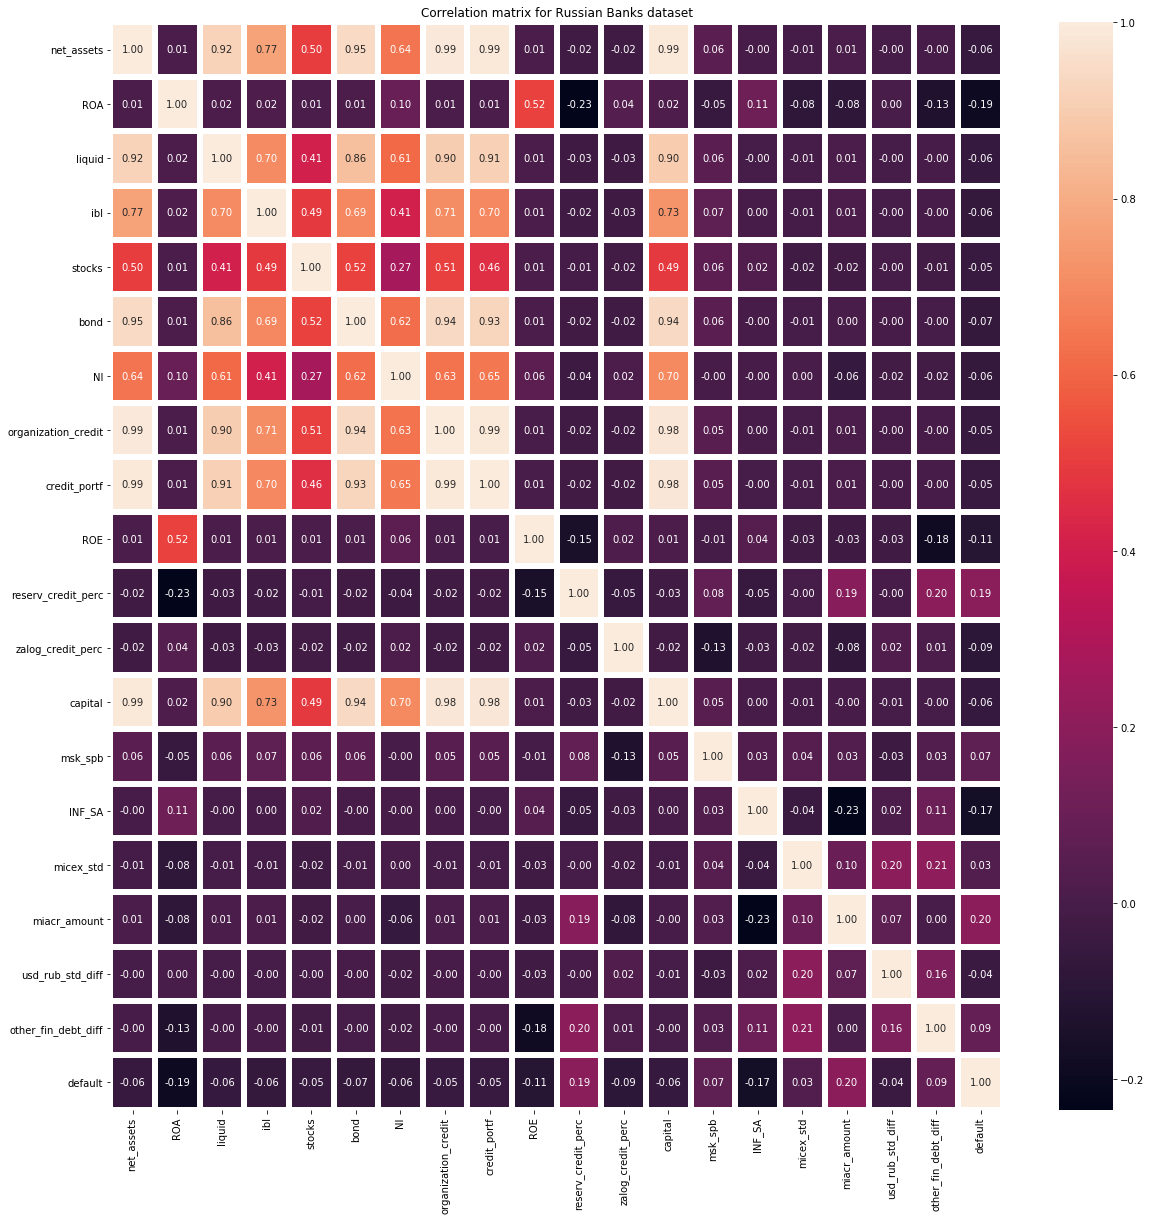

In [72]:
f,ax = plt.subplots(figsize =(20,20))
sns.heatmap(upsampled.corr(), annot = True, linewidths = 5, fmt = '.2f', ax = ax)
plt.title("Correlation matrix for Russian Banks dataset")
plt.show()

This plot really looks clear, we can observe the correlation between features and the outcome. For example, we can indicate that there is a negative correlation between ROA and default. We would use other technique to rank the features importrance.

## Univariate Feature Selection 

This is the simplest and fastest method. It works by implementing statistical test like ANOVA or Chi-square to measure how strongly the response variable depends on each feature. We will import the scikit-learn library called SelectKBest to test a specific number of features. The library returns the K best features given some scoring function. For our classification task, the library comes with three scoring fucntions: χ2, ANOVA F-value, and the mutual information score. We will use the F-value test to define if there is a linear dependency between the target and each features.

In [73]:
# Apply SelectKBest on the entire dataset
y_train = upsampled.default
X_train = upsampled.drop("default", axis = 1)

selected_feature = SelectKBest(score_func = f_classif, k = 10)
fit = selected_feature.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
# concat the two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['variable','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               variable        Score
16         miacr_amount  5014.531307
1                   ROA  4460.487396
10   reserv_credit_perc  4385.988717
14               INF_SA  3422.819610
9                   ROE  1324.315480
18  other_fin_debt_diff   889.081179
11    zalog_credit_perc   887.743954
13              msk_spb   537.918572
5                  bond   494.226558
3                   ibl   476.425612


The above features are the best 10 important relevant for our bankruptcy predictions.

## Feature Importance with Tree based method 

I can get the feature importance of each feature of my dataset by using the feature importance property of the model.

Feature importance gives a score of each feature of my data, which implies the higher the score , the more relevant or important the feature is towards the response variable.

I will be extracting the top 10 features for this dataset by using random forest.

To implement feature importance method, the training data should not have correlated features. I am going to remove correlated features in the code below.

In [75]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

ibl                    0.111952
NI                     0.094770
ROE                    0.092387
ROA                    0.083809
liquid                 0.063415
INF_SA                 0.053059
organization_credit    0.050587
bond                   0.049888
reserv_credit_perc     0.047708
capital                0.047259
credit_portf           0.043535
net_assets             0.043166
miacr_amount           0.040538
zalog_credit_perc      0.039476
other_fin_debt_diff    0.038056
usd_rub_std_diff       0.036377
micex_std              0.033084
stocks                 0.023248
msk_spb                0.007688
dtype: float64

No handles with labels found to put in legend.


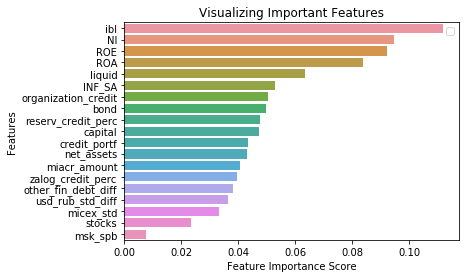

In [76]:
# visualizing the feature importance 
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Generating Models on Selected Features 

In this section, we are going to apply models on the selected features from random forest classifier for further classification. We would drop all the variables in our dataset except the features selected 

In [77]:
# splitting the dataset into features and label
X = upsampled[['ibl','NI','ROE','ROA','liquid','INF_SA','organization_credit','bond',
                    'reserv_credit_perc','capital','net_assets','zalog_credit_perc','credit_portf',
                    'miacr_amount','other_fin_debt_diff','usd_rub_std_diff','micex_std','stocks',
                   'msk_spb']]
y = upsampled['default']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 27) # 80% training and 20% test

### Logistic Regression 

In [79]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
Log_acc = round(accuracy_score(y_test,prediction_lr)*100,2)
print("The accuracy of the Logistics Regression is ", Log_acc)

The accuracy of the Logistics Regression is  57.69


### Decision Tree

In [80]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test) 
dt_acc = round(accuracy_score(y_test,y_pred) * 100, 2)
print("The accuracy of the Decision tree is ", dt_acc)

The accuracy of the Decision tree is  99.68


### Random Forest

In [81]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
rf_acc = round(accuracy_score(y_test, rf_pred) * 100, 2)
print("The accuracy of the random forest is ", rf_acc)

The accuracy of the random forest is  100.0


### Naive Bayes

In [82]:
naiye = BernoulliNB()
naiye.fit(X_train,y_train)
gnb_pred=naiye.predict(X_test) 
nb_acc = round(accuracy_score(y_test,gnb_pred)*100,2)
print("The accuracy of the Naive Bayes is ", nb_acc)

The accuracy of the Naive Bayes is  66.61


### Support Vector Classifier

In [83]:
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
print('The accuracy of svm is ', svm_pred)

The accuracy of svm is  [1 1 1 ... 1 1 1]


### Neural Networks

In [84]:
NN = MLPClassifier(solver='lbfgs', alpha = 1e-5,
                hidden_layer_sizes=(42,))
NN.fit(X_train,y_train)
NN_pred = NN.predict(X_test)

acc_NN = round(accuracy_score(Y_test,downsampled_NN_pred) * 100, 2)
print('The accuracy of the neural nets Classifier is',acc_NN)

The accuracy of the neural nets Classifier is 1.34


### Evaluation Metrics

Here we are going to look into performance metrics to properly evaluate our model performance.

recall:  0.9520340012143291
precision:  0.543877904960111
F1-score:  0.6922737306843267
ROC_AUC_score:  0.5769101674472616


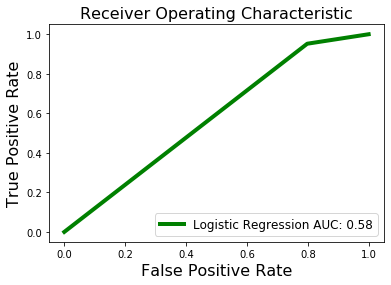

Text(0.5, 1, 'Logistic Regression \n confusion matrix')

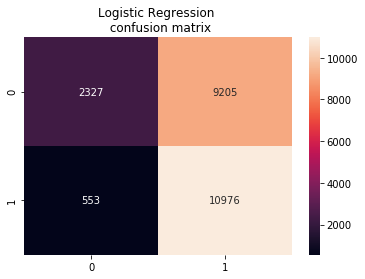

In [179]:
# Logistic regression
print("recall: ", recall_score(y_test,prediction_lr))
print("precision: ", precision_score(y_test,prediction_lr))
print('F1-score: ', f1_score(y_test,prediction_lr))
print('ROC_AUC_score: ', roc_auc_score(y_test,prediction_lr))
classification_report(y_test,prediction_lr)
# roc curve 
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, prediction_lr)
lr_roc_auc = auc(lr_fpr, lr_tpr)

label = 'Logistic Regression AUC:' + ' {0:.2f}'.format(lr_roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

# confusion matrix
cm = confusion_matrix(y_test,prediction_lr) 
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Logistic Regression \n confusion matrix")

recall:  1.0
precision:  0.9936223390502457
F1-score:  0.9968009683555248
ROC:  0.9967915365938258


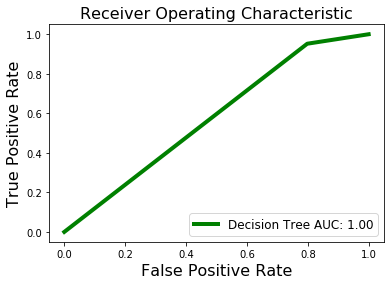

Text(0.5, 1, 'Decision Tree \n confusion matrix')

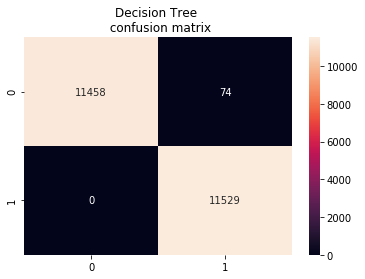

In [180]:
# Decision Tree
print("recall: ", recall_score(y_test,y_pred))
print("precision: ", precision_score(y_test,y_pred))
print('F1-score: ', f1_score(y_test,y_pred))
print('ROC: ', roc_auc_score(y_test,y_pred))

# roc curve 
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_pred)
dt_roc_auc = auc(dt_fpr, dt_tpr)

label = 'Decision Tree AUC:' + ' {0:.2f}'.format(dt_roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

# confusion matrix
cm = confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Decision Tree \n confusion matrix")

recall:  1.0
precision:  0.9999132697311361
F1-score:  0.9999566329849516
ROC:  0.999956642386403


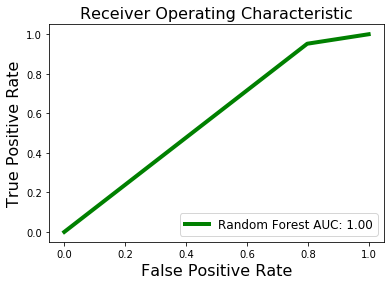

Text(0.5, 1, 'Random Forest \n confusion matrix')

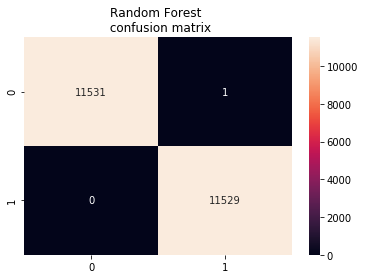

In [181]:
# Random Forest
print("recall: ", recall_score(y_test,rf_pred))
print("precision: ", precision_score(y_test,rf_pred))
print('F1-score: ', f1_score(y_test,rf_pred))
print('ROC: ', roc_auc_score(y_test,rf_pred))

# roc curve
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)

label = 'Random Forest AUC:' + ' {0:.2f}'.format(rf_roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

# confusion matrix
cm = confusion_matrix(y_test,rf_pred) 
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Random Forest \n confusion matrix")

recall:  0.5446265938069217
precision:  0.7193263833199679
F1-score:  0.6199032480995162
ROC:  0.6660871435909391


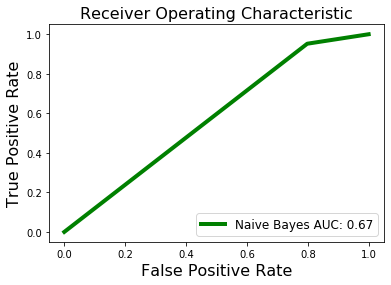

Text(0.5, 1, 'naive baiye \n confusion matrix')

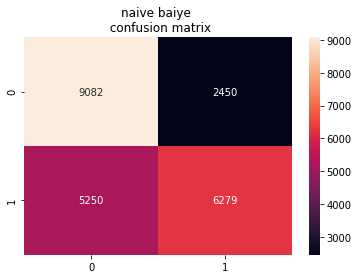

In [182]:
# Naive bayes
print("recall: ", recall_score(y_test,gnb_pred))
print("precision: ", precision_score(y_test,gnb_pred))
print('F1-score: ', f1_score(y_test,gnb_pred))
print('ROC: ', roc_auc_score(y_test,gnb_pred))

# roc curve
NB_fpr, NB_tpr, thresholds = roc_curve(y_test, gnb_pred)
NB_roc_auc = auc(NB_fpr, NB_tpr)

label = 'Naive Bayes AUC:' + ' {0:.2f}'.format(NB_roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

# confusion matrix
cm = confusion_matrix(y_test,gnb_pred) 
sns.heatmap(cm,annot=True,fmt="d")
plt.title("naive baiye \n confusion matrix")

recall:  0.9793564055859137
precision:  0.5361348528015195
F1-score:  0.692933198318451
ROC:  0.5661176755643755


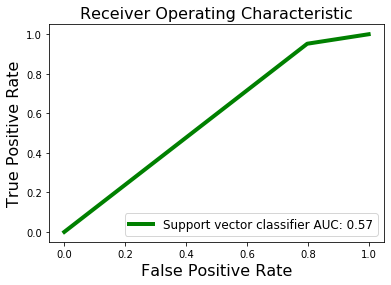

Text(0.5, 1, 'Support vector classifier \n confusion matrix')

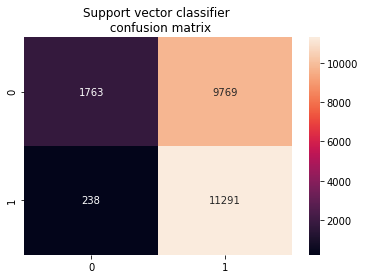

In [183]:
# Support Vector Machine
print("recall: ", recall_score(y_test,svm_pred))
print("precision: ", precision_score(y_test,svm_pred))
print('F1-score: ', f1_score(y_test,svm_pred))
print('ROC: ', roc_auc_score(y_test,svm_pred))

# roc curve
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_pred)
svm_roc_auc = auc(svm_fpr, svm_tpr)

label = 'Support vector classifier AUC:' + ' {0:.2f}'.format(svm_roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

# confusion matrix
cm = confusion_matrix(y_test,svm_pred) 
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Support vector classifier \n confusion matrix")

recall:  0.42544886807181886
precision:  0.5658092052139808
F1-score:  0.48569165263887515
ROC:  0.5495263764569986


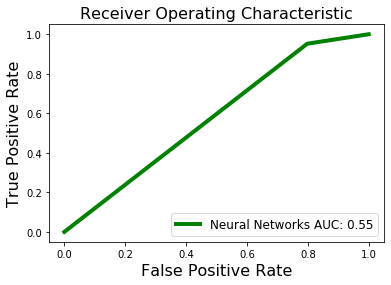

Text(0.5, 1, 'Neural Net \n confusion matrix')

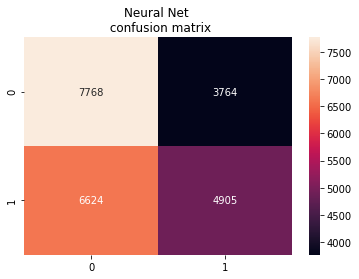

In [184]:
# Neural Net
print("recall: ", recall_score(y_test,NN_pred))
print("precision: ", precision_score(y_test,NN_pred))
print('F1-score: ', f1_score(y_test,NN_pred))
print('ROC: ', roc_auc_score(y_test,NN_pred))

# roc curve
NN_fpr, NN_tpr, thresholds = roc_curve(y_test, NN_pred)
NN_roc_auc = auc(NN_fpr, NN_tpr)

label = 'Neural Networks AUC:' + ' {0:.2f}'.format(NN_roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

# confusion matrix
cm = confusion_matrix(y_test,NN_pred) 
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Neural Net \n confusion matrix")

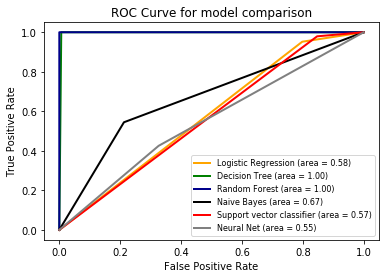

In [195]:
# Roc curve for model comparison
plt.plot(lr_fpr, lr_tpr, color='orange',
         lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(dt_fpr, dt_tpr, color='green',
         lw=2, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='darkblue',
         lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(NB_fpr, NB_tpr, color='black',
         lw=2, label='Naive Bayes (area = %0.2f)' % NB_roc_auc)
plt.plot(svm_fpr, svm_tpr, color='red',
         lw=2, label='Support vector classifier (area = %0.2f)' % svm_roc_auc)
plt.plot(NN_fpr, NN_tpr, color='grey',
         lw=2, label='Neural Net (area = %0.2f)' % NN_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for model comparison')
plt.legend(loc= 4, fontsize = 8)
plt.show()

After dropping correlated features, it is shown above that there are still more correlated features. There are correlation values greater than 0.8 but I want to inspect the result without dropping them.

## Conclusion 

The purpose of this research is to illustrate how machine learning techniques can be applied to bankruptcy predictions. Through our dissertation, we developed multiple classification algorithms for the Russian Banks bankruptcy prediction  between 2008 and 2014 with focus on financial statements, bank system metrics and macroeconomic indicators.
We created six different machine learning models, one for each algorithm, that are relevant to the classification problem. These models were tested and compared, where two outperformed the rest of the techniques. The two models were selected based on maximizing and minimizing true positive rate (TPR) and False positive rate (FPR) respectively. The result indicated that the tree based and ensembled method yielded the best evaluation performance.
Our research indicated that Random forest and decision are the best performing models by obtaining an accuracy of 99.5% and 98.64% respectively on the imbalanced data. Accuracy of 99.5% and 98.8% were achieveed for random forest and decision tree respectively on the oversampled data. overall, these models achieved an AUROC of approximately 100% when we performed variable selection. The AUROC score indicates that both models correctly predicted nearly 100% of the positive class (bankrupt banks).
Our models provide somewhat comparison with previous studies in terms of feature selection. This implies that our models were built with some financial ratios that conform to models that were developed previously. However, our models indicate that there are significant factors that were neglected in the past such as net income, stocks, bonds, capital etc. These features have strong importance in our models. To summarise the variable selection, liabilities became the most important features in our models compared to how assets ratios has played a significant role in the past.
